In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Electric Car.csv', sep=',')

In [2]:
df = data.copy()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [12]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


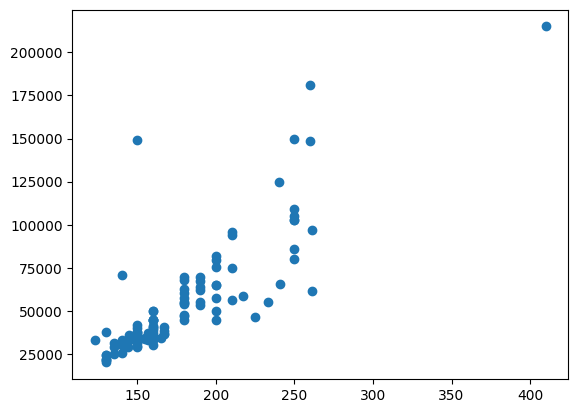

In [80]:
plt.scatter(y=df['PriceEuro'], x=df['TopSpeed_KmH'])

In [52]:
df2 = pd.DataFrame({
    'price': df.groupby(['TopSpeed_KmH'])['PriceEuro'].min()
    }).reset_index()

df3 = pd.DataFrame({
    'price': df.groupby(['TopSpeed_KmH'])['PriceEuro'].max()
    }).reset_index()

In [57]:
con_df = pd.concat([df2, df3]).reset_index(drop=True)

In [85]:
short_con_df = con_df.iloc[[1, 0, 31, 47, 49, 23, 17]]

In [94]:
short_con_df.reset_index(drop=True)

,TopSpeed_KmH,price
0,130,20129
1,123,33246
2,150,149000
3,260,180781
4,410,215000
5,261,61480
6,225,46380


In [92]:
x = short_con_df['TopSpeed_KmH']
y = short_con_df['price']
area = abs((np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1))) / 2)
area

24396621.0

In [96]:
short_con_df['TopSpeed_KmH'].max() * short_con_df['price'].max()

88150000

([<matplotlib.axis.YTick at 0x173c19090>,
 [Text(0, 15000, '15000'),
  Text(0, 20000, '20000'),
  Text(0, 25000, '25000'),
  Text(0, 30000, '30000'),
  Text(0, 35000, '35000'),
  Text(0, 40000, '40000'),
  Text(0, 45000, '45000'),
  Text(0, 50000, '50000'),
  Text(0, 55000, '55000'),
  Text(0, 60000, '60000'),
  Text(0, 65000, '65000'),
  Text(0, 70000, '70000'),
  Text(0, 75000, '75000'),
  Text(0, 80000, '80000'),
  Text(0, 85000, '85000'),
  Text(0, 90000, '90000'),
  Text(0, 95000, '95000'),
  Text(0, 100000, '100000'),
  Text(0, 105000, '105000'),
  Text(0, 110000, '110000'),
  Text(0, 115000, '115000'),
  Text(0, 120000, '120000'),
  Text(0, 125000, '125000'),
  Text(0, 130000, '130000'),
  Text(0, 135000, '135000'),
  Text(0, 140000, '140000'),
  Text(0, 145000, '145000'),
  Text(0, 150000, '150000'),
  Text(0, 155000, '155000'),
  Text(0, 160000, '160000'),
  Text(0, 165000, '165000'),
  Text(0, 170000, '170000'),
  Text(0, 175000, '175000'),
  Text(0, 180000, '180000'),
  Text

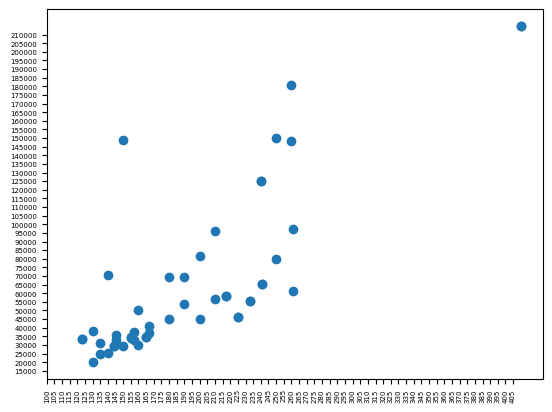

In [77]:
import numpy as np

plt.scatter(y=con_df['price'], x=con_df['TopSpeed_KmH'])
plt.xticks(np.arange(100, max(con_df['TopSpeed_KmH']), 5), fontsize=5, rotation=90)
plt.yticks(np.arange(15000, max(con_df['price']), 5000), fontsize=5)

In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [103]:
le_transformed = le.fit_transform(df['BodyStyle'])
sum_ = le_transformed.sum()
cat_count = len(np.unique(le_transformed))

In [104]:
sum_, cat_count

(420, 9)